In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\HP\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.shape,test.shape

((140700, 20), (93800, 19))

In [5]:
train['Depression'].value_counts()

Depression
0    115133
1     25567
Name: count, dtype: int64

- Target column('Depression') have imbalanced data.

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [7]:
train = train.drop('Name', axis=1)
test = test.drop('Name', axis=1)

# Feature Engineering

#### Profession column

In [8]:
train['Profession'].isnull().sum()

36630

In [9]:
train['Profession'] = train['Profession'].fillna("missing")
test['Profession'] = test['Profession'].fillna("missing")

In [11]:
profession_cnt =train['Profession'].value_counts()
profession_cnt

Profession
missing              36630
Teacher              24906
Content Writer        7814
Architect             4370
Consultant            4229
                     ...  
Dev                      1
BE                       1
B.Com                    1
Family Consultant        1
Yuvraj                   1
Name: count, Length: 65, dtype: int64

In [12]:
profession_threshold_df = 2814
profession_threshold_tf = 1594
profession_cnt_df = train['Profession'].value_counts()
profession_cnt_tf = test['Profession'].value_counts()
replace_profession_df = profession_cnt[profession_cnt < profession_threshold_df].index
replace_profession_tf = profession_cnt_tf[profession_cnt_tf < profession_threshold_tf].index

In [13]:
train['Profession'] = train['Profession'].replace(replace_profession_df,"Unknown_profession")
test['Profession'] = test['Profession'].replace(replace_profession_tf,"Unknown_profession")

In [14]:
train['Profession'].value_counts()

Profession
Unknown_profession        36771
missing                   36630
Teacher                   24906
Content Writer             7814
Architect                  4370
Consultant                 4229
HR Manager                 4022
Pharmacist                 3893
Doctor                     3255
Business Analyst           3161
Entrepreneur               2968
Chemist                    2967
Chef                       2862
Educational Consultant     2852
Name: count, dtype: int64

#### Academic Pressure

In [15]:
print(train['Academic Pressure'].isnull().sum())
print(test['Academic Pressure'].isnull().sum())

112803
75033


In [16]:
# Fill missing values in numerical columns with the mean
for column in train.columns:
  if pd.api.types.is_numeric_dtype(train[column]):
    train[column] = train[column].fillna(train[column].mean())
    if column in test.columns:
      test[column] = test[column].fillna(test[column].mean())

In [17]:
train['Academic Pressure'].value_counts()

Academic Pressure
3.142273    112803
3.000000      7463
5.000000      6296
4.000000      5158
1.000000      4801
2.000000      4179
Name: count, dtype: int64

In [ ]:
# Fill missing values in 'Study Satisfaction' with the median
train['Study Satisfaction'] = train['Study Satisfaction'].fillna(train['Study Satisfaction'].median())

# If you want to fill missing values in the test set as well, uncomment the following line:
test['Study Satisfaction'] = test['Study Satisfaction'].fillna(test['Study Satisfaction'].median())

In [19]:
# Fill missing values in 'Study Satisfaction' with the median
train['Job Satisfaction'] = train['Job Satisfaction'].fillna(train['Job Satisfaction'].median())

# If you want to fill missing values in the test set as well, uncomment the following line:
test['Job Satisfaction'] = test['Job Satisfaction'].fillna(test['Job Satisfaction'].median())

In [20]:
train.shape,test.shape

((140700, 19), (93800, 18))

In [21]:
df = train.copy()
tf = test.copy()
df.shape,tf.shape

((140700, 19), (93800, 18))

In [22]:
df['CGPA'].isnull().sum()
tf['CGPA'].isnull().sum()

0

In [23]:
df['CGPA'].fillna(df['CGPA'].mean(),inplace=True)
tf['CGPA'].fillna(tf['CGPA'].mean(),inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_8144\2647841782.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CGPA'].fillna(df['CGPA'].mean(),inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_8144\2647841782.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 19 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Gender                                 140700 non-null  object 
 2   Age                                    140700 non-null  float64
 3   City                                   140700 non-null  object 
 4   Working Professional or Student        140700 non-null  object 
 5   Profession                             140700 non-null  object 
 6   Academic Pressure                      140700 non-null  float64
 7   Work Pressure                          140700 non-null  float64
 8   CGPA                                   140700 non-null  float64
 9   Study Satisfaction                     140700 non-null  float64
 10  Job Satisfaction                       140700 non-null  

In [25]:
df['Degree'].isnull().sum()

2

In [27]:
df['Degree'].fillna(df['Degree'].mode()[0],inplace=True)
tf['Degree'].fillna(tf['Degree'].mode()[0],inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_8144\2518624376.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tf['Degree'].fillna(tf['Degree'].mode()[0],inplace=True)


In [28]:
# Check if 'Name' column exists before dropping
if 'Name' in df.columns:
    df.drop(['id','Name'],axis=1,inplace=True)
if 'Name' in tf.columns:
  tf.drop(['id','Name'],axis=1,inplace=True)

In [29]:
df.shape,tf.shape

((140700, 19), (93800, 18))

In [30]:
df = pd.get_dummies(df,columns=['Profession'],drop_first=True)
tf = pd.get_dummies(tf,columns=['Profession'],drop_first=True)

In [31]:
df.shape,tf.shape

((140700, 31), (93800, 30))

<Axes: xlabel='Dietary Habits'>

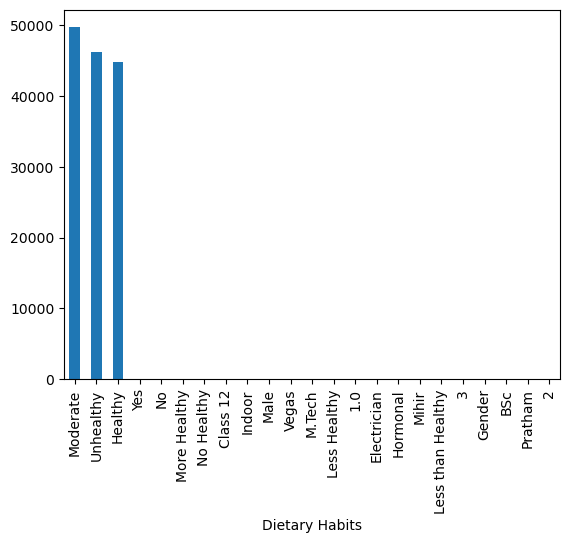

In [32]:
df['Dietary Habits'].value_counts().plot(kind='bar')

In [33]:
df['Dietary Habits'].fillna(df['Dietary Habits'].mode()[0],inplace=True)
tf['Dietary Habits'].fillna(tf['Dietary Habits'].mode()[0],inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_8144\3687034632.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Dietary Habits'].fillna(df['Dietary Habits'].mode()[0],inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_8144\3687034632.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [34]:
df['Financial Stress'].fillna(df['Financial Stress'].median(),inplace=True)
tf['Financial Stress'].fillna(tf['Financial Stress'].median(),inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_8144\3483033245.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Financial Stress'].fillna(df['Financial Stress'].median(),inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_8144\3483033245.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

## Work with Categorical columns

#### Gender column

In [35]:
df['Gender'].value_counts()

Gender
Male      77464
Female    63236
Name: count, dtype: int64

In [36]:
print(df.shape,tf.shape)
df = pd.get_dummies(df,columns=['Gender'],drop_first=True)
tf = pd.get_dummies(tf,columns=['Gender'],drop_first=True)

(140700, 31) (93800, 30)


In [37]:
df.shape,tf.shape

((140700, 31), (93800, 30))

#### City column

In [38]:
df['City'].value_counts()

City
Kalyan         6591
Patna          5924
Vasai-Virar    5765
Kolkata        5689
Ahmedabad      5613
               ... 
Shrey             1
Ivaan             1
Vaanya            1
Gaurav            1
Unirar            1
Name: count, Length: 98, dtype: int64

In [39]:
city_df = 3000
city_tf = 2000
city_count_df = df['City'].value_counts()
city_count_tf = tf['City'].value_counts()
replace_city_df = city_count_df[city_count_df < city_df].index
replace_city_tf = city_count_tf[city_count_tf < city_tf].index

In [40]:
df['City'] = df['City'].replace(replace_city_df,'Unknown_city')
tf['City'] = tf['City'].replace(replace_city_tf,'Unknown_city')

In [41]:
df['City'].value_counts()

City
Kalyan           6591
Patna            5924
Vasai-Virar      5765
Kolkata          5689
Ahmedabad        5613
Meerut           5528
Ludhiana         5226
Pune             5210
Rajkot           5207
Visakhapatnam    5176
Srinagar         5074
Mumbai           4966
Indore           4872
Agra             4684
Surat            4636
Varanasi         4606
Vadodara         4568
Hyderabad        4496
Kanpur           4398
Jaipur           4328
Thane            4289
Lucknow          4280
Nagpur           4209
Bangalore        4123
Chennai          4044
Ghaziabad        3620
Delhi            3593
Bhopal           3475
Faridabad        3268
Nashik           3144
Unknown_city       98
Name: count, dtype: int64

In [42]:
df = pd.get_dummies(df,columns=['City'],drop_first=True)
tf = pd.get_dummies(tf,columns=['City'],drop_first=True)

In [43]:
df.shape,tf.shape

((140700, 60), (93800, 59))

#### Working Professional or Student column

In [44]:
df = pd.get_dummies(df,columns=['Working Professional or Student'],drop_first=True)
tf = pd.get_dummies(tf,columns=['Working Professional or Student'],drop_first=True)
df.shape,tf.shape

((140700, 60), (93800, 59))

# OHE

In [ ]:
train = pd.get_dummies(train,columns=['Profession'],drop_first=True)
test = pd.get_dummies(test,columns=['Profession'],drop_first=True)